# Reorder Point Analysis - Solution

This notebook demonstrates how to calculate and optimize reorder points (ROP) for inventory management.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Part 1: Basic ROP Calculation

Lead Time Demand: 500 units
Reorder Point: 650 units


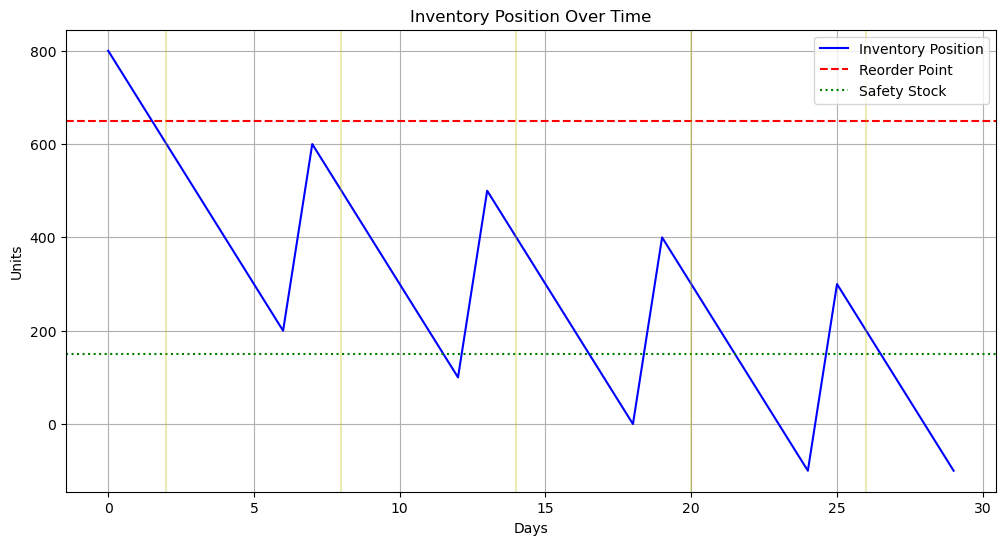

In [2]:
# Parameters
daily_demand = 100
lead_time = 5
safety_stock = 150
service_level = 0.95

# Calculate ROP
lead_time_demand = daily_demand * lead_time
rop = lead_time_demand + safety_stock

print(f'Lead Time Demand: {lead_time_demand} units')
print(f'Reorder Point: {rop} units')

# Simulate inventory position
days = 30
order_quantity = 500
inventory = np.zeros(days)
inventory[0] = 800  # Starting inventory

orders_placed = []
orders_received = []

for day in range(1, days):
    # Subtract daily demand
    inventory[day] = inventory[day-1] - daily_demand
    
    # Check if we need to place an order
    if inventory[day] <= rop and len(orders_placed) == len(orders_received):
        orders_placed.append(day)
    
    # Check if we receive any orders
    if len(orders_placed) > len(orders_received):
        if day - orders_placed[len(orders_received)] >= lead_time:
            inventory[day] += order_quantity
            orders_received.append(day)

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(range(days), inventory, '-b', label='Inventory Position')
plt.axhline(y=rop, color='r', linestyle='--', label='Reorder Point')
plt.axhline(y=safety_stock, color='g', linestyle=':', label='Safety Stock')

for order_day in orders_placed:
    plt.axvline(x=order_day, color='y', alpha=0.3)
    
plt.xlabel('Days')
plt.ylabel('Units')
plt.title('Inventory Position Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Part 2: Inventory Position Analysis

Average Inventory: 301.4 units
Service Level Achieved: 86.7%
Days Below ROP: 58


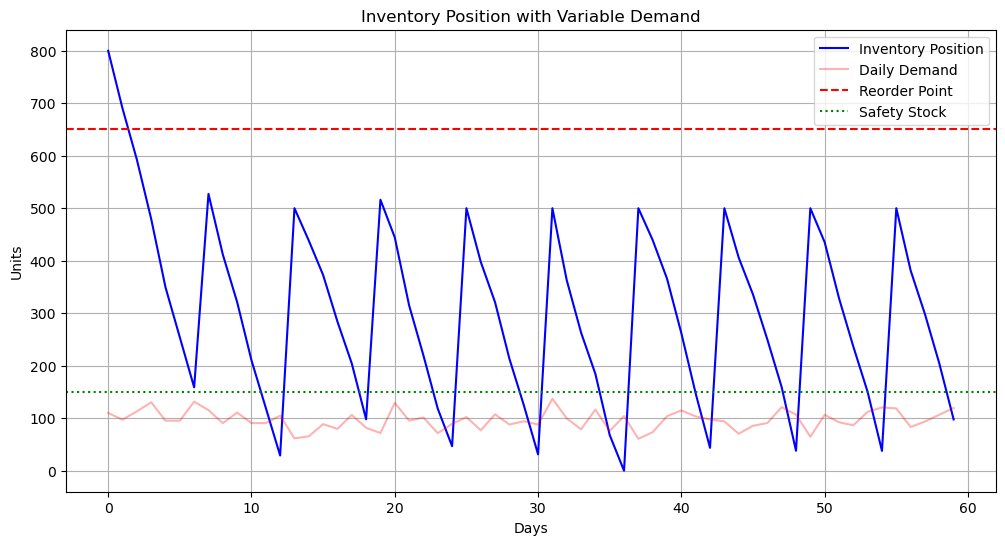

In [3]:
# Simulate with variable demand
np.random.seed(42)
days = 60
demand_mean = daily_demand
demand_std = 20

# Generate daily demands
daily_demands = np.random.normal(demand_mean, demand_std, days)
daily_demands = np.maximum(daily_demands, 0)  # No negative demand

# Simulate inventory
inventory = np.zeros(days)
inventory[0] = 800
stockouts = 0
orders_placed = []
orders_received = []

for day in range(1, days):
    # Subtract daily demand
    inventory[day] = inventory[day-1] - daily_demands[day-1]
    
    # Record stockout
    if inventory[day] < 0:
        stockouts += 1
        inventory[day] = 0
    
    # Place order if needed
    if inventory[day] <= rop and len(orders_placed) == len(orders_received):
        orders_placed.append(day)
    
    # Receive order
    if len(orders_placed) > len(orders_received):
        if day - orders_placed[len(orders_received)] >= lead_time:
            inventory[day] += order_quantity
            orders_received.append(day)

# Calculate metrics
average_inventory = np.mean(inventory)
service_level_achieved = 1 - stockouts/days
below_rop_count = np.sum(inventory <= rop)

print(f'Average Inventory: {average_inventory:.1f} units')
print(f'Service Level Achieved: {service_level_achieved:.1%}')
print(f'Days Below ROP: {below_rop_count}')

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(range(days), inventory, '-b', label='Inventory Position')
plt.plot(range(days), daily_demands, '-r', alpha=0.3, label='Daily Demand')
plt.axhline(y=rop, color='r', linestyle='--', label='Reorder Point')
plt.axhline(y=safety_stock, color='g', linestyle=':', label='Safety Stock')

plt.xlabel('Days')
plt.ylabel('Units')
plt.title('Inventory Position with Variable Demand')
plt.legend()
plt.grid(True)
plt.show()